# Neste exemplo:
- Sitema de recomendação para filmes

In [ ]:
#Importação de bibliotecas
import pandas as pd

In [ ]:
#Ler os arquivos csv
df_movies = pd.read_csv('/content/drive/MyDrive/4 - Estudos/2 - Machine Learning Enginner/Módulo 1/Aula Pratica 2 - Sistema de Recomendacao/movies.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/4 - Estudos/2 - Machine Learning Enginner/Módulo 1/Aula Pratica 2 - Sistema de Recomendacao/ratings.csv')

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
### Analisar Dataset ###
#Recuperar qual é o nome do filme com id = 51
print(df_movies[df_movies['movieId'] == 50])

    movieId                       title                  genres
46       50  Usual Suspects, The (1995)  Crime|Mystery|Thriller


In [ ]:
#Agrupar os dataframes para ter a junção de cada usuário e filme que viu | Combina os dataframes por meio do id do filme
movie_rating = pd.merge(df_movies,
                        df_ratings,
                        on = 'movieId')

In [ ]:
movie_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
#Analiasndo os dados
import matplotlib.pyplot as plt #Biblioteca utilizada para plotar gráficos ao estilo matlab
import seaborn as sns #Biblioteca utilizada para plotar gráficos mais detalhados

In [ ]:
#Encontra o valor médio das notas atribuidas para cada filme
movie_rating.groupby('title')['rating'].mean().sort_values(ascending = False).head() #Agrupa o dataframe movie_rating pela coluna titulo
#Encontra a média das notas de cada filme e ordena a lista dos valores

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [ ]:
#Conta a quantidade de notas (rating) que cada filme recebeu
movie_rating.groupby('title')['rating'].count().sort_values(ascending = False)
#Soma a quantidade de notas que cada filme recebeu

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: rating, Length: 9719, dtype: int64

In [ ]:
#Cria o dataframe que vai conter o nome de cada filme e a media das notas recebidas
ratings = pd.DataFrame(movie_rating.groupby('title')['rating'].mean())
ratings.sort_values(by = 'rating',
                    ascending = False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [ ]:
#Adiciona a coluna que contem a quantidade de notas que cada filme recebeu
ratings['Num de Avaliacoes'] = pd.DataFrame(movie_rating.groupby('title')['rating'].count())
ratings.sort_values(by = 'Num de Avaliacoes',
                    ascending = False).head()

,rating,Num de Avaliacoes
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [ ]:
ratings.sort_values(by = 'rating',
                    ascending = False).head()

,rating,Num de Avaliacoes
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


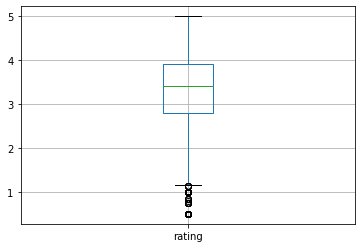

In [ ]:
#Analisando os dados
ratings.boxplot(column = 'rating')

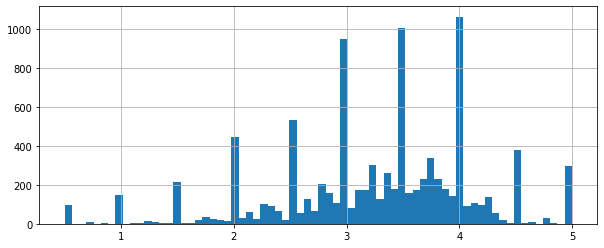

In [ ]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70); #Plota o histograma para a média das notas recebidas

In [ ]:
#Contrução da matriz que relaciona cada usuário à nota (rating) que ele atribiu a cada filme
movie_rating_matriz = movie_rating.pivot_table(index = 'userId',
                                               columns = 'title',
                                               values = 'rating')
movie_rating_matriz.tail()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [ ]:
#Contrução da matriz de correlação entre cada um dos filmes
movie_corr_matriz = movie_rating_matriz.corr()
movie_corr_matriz.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Tis the Season for Love (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.997176,0.500000,...,NaN,NaN,NaN,NaN,NaN,-0.067522,NaN,NaN,-0.002732,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,0.997176,NaN,1.000000,0.944911,...,NaN,-0.866025,NaN,NaN,NaN,-0.388883,0.831858,1.0,0.572078,NaN


In [ ]:
#Refinar matriz de correlação
movie_corr_matriz = movie_rating_matriz.corr(method = 'pearson',
                                             min_periods = 50) #Utiliza o método de pearson para gera a correlação
#Apenas considera as correlaçöes entre filmes que tiveram mais de 50 avaliações
movie_corr_matriz.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Tis the Season for Love (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Verificando o tamanho da matriz
movie_rating_matriz.shape

(610, 9719)

In [ ]:
testUser = movie_rating_matriz.iloc[600].dropna()
testUser.head(10).sort_values(ascending = False)

title
12 Angry Men (1957)         5.0
Band of Brothers (2001)     5.0
Avengers, The (2012)        4.5
Batman Begins (2005)        4.5
Big Hero 6 (2014)           4.5
2012 (2009)                 4.0
Armageddon (1998)           4.0
Avatar (2009)               4.0
Beautiful Mind, A (2001)    4.0
Blade Runner 2049 (2017)    4.0
Name: 601, dtype: float64

In [ ]:
#Quantidade de avalições realizzadas pelo usuário
len(testUser)

101

In [ ]:
#Identificando o filme de indice 2
testUser.index[2]

'Armageddon (1998)'

In [ ]:
#Nota atribuída pelo usuário ao filme de indice 2
testUser[2]

4.0

In [ ]:
#Encontrando as correlaçÕes não nulas entre o filme Armagedon
movie_corr_matriz[testUser.index[2]].dropna().sort_values(ascending = False)

title
Armageddon (1998)                                                                 1.000000
Independence Day (a.k.a. ID4) (1996)                                              0.665768
True Lies (1994)                                                                  0.547632
Star Wars: Episode I - The Phantom Menace (1999)                                  0.457663
American Pie (1999)                                                               0.430223
Men in Black (a.k.a. MIB) (1997)                                                  0.424516
Indiana Jones and the Temple of Doom (1984)                                       0.420462
Braveheart (1995)                                                                 0.414973
Saving Private Ryan (1998)                                                        0.409837
Mission: Impossible (1996)                                                        0.394391
Speed (1994)                                                                      0.

In [ ]:
similarMoviesCandidates = pd.Series()
for i in range(0, len(testUser.index)):
  print('Adicionando filme similar a ' +testUser.index[i]+ '...')
  #Recuperando o filme que apresenta correlação
  similar = movie_corr_matriz[testUser.index[i]].dropna()
  similar = similar.map(lambda x: x* testUser[i]) #Escala para 5 os filmes com amior similaridade
  similarMoviesCandidates = similarMoviesCandidates.append(similar)

Adicionando filme similar a 12 Angry Men (1957)...
Adicionando filme similar a 2012 (2009)...
Adicionando filme similar a Armageddon (1998)...
Adicionando filme similar a Avatar (2009)...
Adicionando filme similar a Avengers, The (2012)...
Adicionando filme similar a Band of Brothers (2001)...
Adicionando filme similar a Batman Begins (2005)...
Adicionando filme similar a Beautiful Mind, A (2001)...
Adicionando filme similar a Big Hero 6 (2014)...
Adicionando filme similar a Blade Runner 2049 (2017)...
Adicionando filme similar a Bourne Ultimatum, The (2007)...
Adicionando filme similar a Brave (2012)...
Adicionando filme similar a Bug's Life, A (1998)...
Adicionando filme similar a Casablanca (1942)...
Adicionando filme similar a Casino Royale (2006)...
Adicionando filme similar a Catch Me If You Can (2002)...
Adicionando filme similar a City of God (Cidade de Deus) (2002)...
Adicionando filme similar a Coco (2017)...
Adicionando filme similar a Contact (1997)...
Adicionando filme sim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
#Ordena os filmes encontrados (serie) em ordem de similaridade
similarMoviesCandidates.sort_values(inplace = True,
                                    ascending = False)
similarMoviesCandidates.head(15)

12 Angry Men (1957)                                          5.0
Monsters, Inc. (2001)                                        5.0
Departed, The (2006)                                         5.0
Fight Club (1999)                                            5.0
Finding Nemo (2003)                                          5.0
Godfather, The (1972)                                        5.0
How to Train Your Dragon (2010)                              5.0
Inception (2010)                                             5.0
Incredibles, The (2004)                                      5.0
Interstellar (2014)                                          5.0
Iron Man (2008)                                              5.0
Life Is Beautiful (La Vita è bella) (1997)                   5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)    5.0
Lord of the Rings: The Two Towers, The (2002)                5.0
Matrix, The (1999)                                           5.0
dtype: float64

In [ ]:
#Como os filmes podem aparecer mais de uma vez, soma a similaridade deles
similarMoviesCandidates = similarMoviesCandidates.groupby(similarMoviesCandidates.index).sum()
similarMoviesCandidates.sort_values(inplace = True,
                                    ascending = False)
similarMoviesCandidates.head(10)

Matrix, The (1999)                                       86.143677
Inception (2010)                                         85.205182
Lord of the Rings: The Return of the King, The (2003)    71.533869
Monsters, Inc. (2001)                                    69.753100
Saving Private Ryan (1998)                               69.333854
Finding Nemo (2003)                                      69.224868
Fight Club (1999)                                        69.197407
Silence of the Lambs, The (1991)                         66.731743
Batman Begins (2005)                                     65.728736
Shawshank Redemption, The (1994)                         64.043923
dtype: float64

In [ ]:
#Encontra apenas os filmes que o usuário ainda não assistiu
filtra_movies = similarMoviesCandidates[~similarMoviesCandidates.isin(testUser.index)]
filtra_movies.head()

12 Angry Men (1957)      5.0
Monsters, Inc. (2001)    5.0
Departed, The (2006)     5.0
Fight Club (1999)        5.0
Finding Nemo (2003)      5.0
dtype: float64

In [ ]:
filme = ['Matrix, The (1999)', 'Inception (2010']
filme in list(testUser.index)

False

In [ ]:
#Filmes a serem recomendados
filtra_movies_recomendados = filtra_movies.sort_values(ascending = False)
filtra_movies_recomendados.head(50)

12 Angry Men (1957)                                          5.000000
Matrix, The (1999)                                           5.000000
WALL·E (2008)                                                5.000000
Shawshank Redemption, The (1994)                             5.000000
Schindler's List (1993)                                      5.000000
Saving Private Ryan (1998)                                   5.000000
Rear Window (1954)                                           5.000000
Usual Suspects, The (1995)                                   5.000000
Ratatouille (2007)                                           5.000000
Princess Bride, The (1987)                                   5.000000
Up (2009)                                                    5.000000
Spirited Away (Sen to Chihiro no kamikakushi) (2001)         5.000000
Lord of the Rings: The Return of the King, The (2003)        5.000000
Memento (2000)                                               5.000000
Monsters, Inc. (2001